In [ ]:
import tensorflow as tf # Imports tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,Embedding
from tensorflow.keras.layers import Conv2D, MaxPooling2D,LSTM,Bidirectional,Attention,concatenate,MultiHeadAttention
from tensorflow.keras.layers import DepthwiseConv2D,Add, ReLU, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.layers import Activation,ActivityRegularization, AvgPool2D, LeakyReLU, Conv2DTranspose
from tensorflow.keras import regularizers, optimizers,losses
from tensorflow.keras.metrics import Recall,Precision,AUC,TruePositives,TrueNegatives,FalseNegatives,FalsePositives, SpecificityAtSensitivity,SensitivityAtSpecificity
from tensorflow.keras.metrics import CategoricalAccuracy, BinaryAccuracy
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import numpy as np
import pandas as pd 
import matplotlib
import seaborn as sns
import sklearn
#import imblearn
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from glob import glob
from keras import backend as K
import skimage.io
import skimage.color
import skimage.filters

In [ ]:
# Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/
%ls


Mounted at /content/drive
/content/drive/MyDrive
'Brain Tumour Classification & Segmentation '@
'Colab Notebooks'@
'Colab Notebooks (1)'/
'creative half y.docx'
 data_1/
'images for review paper .gslides'
 Introduction.gdoc
'mcq ques final.docx'
 model_unet_checkpoint.h5
'Untitled document (1).gdoc'
'Untitled document (2).gdoc'
'Untitled document.gdoc'
'Zoology 2nd Paper Selection Test 2021 Question  by Afroza Begum.gdoc'


In [ ]:
!unzip /content/drive/MyDrive/'Brain Tumour Classification & Segmentation '/datasets/'3 merge masked dataset' -d /content/drive/MyDrive/'Brain Tumour Classification & Segmentation '/datasets/'Segmentation datasets'/

unzip:  cannot find or open /content/drive/MyDrive/Brain Tumour Classification & Segmentation /datasets/3 merge masked dataset, /content/drive/MyDrive/Brain Tumour Classification & Segmentation /datasets/3 merge masked dataset.zip or /content/drive/MyDrive/Brain Tumour Classification & Segmentation /datasets/3 merge masked dataset.ZIP.


In [ ]:
img_shape = (160, 160, 3)
images=[]
mask_img=[]
img_dir='image'
mask_dir='mask'
rel_dirname = "/content/drive/MyDrive/Brain Tumour Classification & Segmentation /datasets/3 merge masked dataset/"
Name = "u-net"


In [ ]:
for dirname in os.listdir(os.path.join(rel_dirname, img_dir)):
  for filename in glob(rel_dirname+ img_dir+'/'+dirname+'/*.jpg'):
      #print(filename)
      mfilename=filename.replace('image','mask')
      mfilename=mfilename.replace('.jpg','_m.jpg')
      #print(mfilename)
      img = image.load_img(os.path.join(rel_dirname, filename),target_size=img_shape)
      img = image.img_to_array(img)
      img = img/255.0
      mimg = image.load_img(os.path.join(rel_dirname, mfilename),target_size=img_shape)
      mimg = image.img_to_array(mimg)
      mimg = mimg/255.0
      images.append(img)
      mask_img.append(mimg)
      

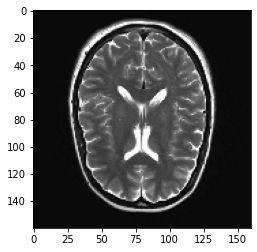

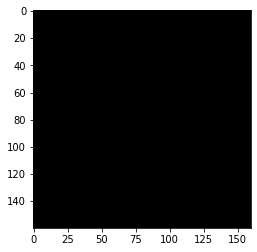

In [ ]:
raw_img= np.array(images)
images=[]
mask_img = np.array(mask_img)

plt.imshow(raw_img[3])
plt.show()
plt.imshow(mask_img[3])
plt.show()

In [ ]:
def segment_model():
    inputs = keras.Input(shape=img_shape, name="img")
    c1 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (inputs)
    c1 = BatchNormalization()(c1)
    c1 = Dropout(0.1) (c1)
    down1 = MaxPooling2D((2, 2)) (c1)
    
    c2 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (down1)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c2)
    c2 = Dropout(0.2) (c2)
    c2 = BatchNormalization()(c2)
    p2 = MaxPooling2D((2, 2)) (c2)
    
    c3 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p2)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c3)
    c3 = BatchNormalization()(c3)
    c3 = Dropout(0.2) (c3)    
    p3 = MaxPooling2D((2, 2)) (c3)
    
    c4 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p3)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c4)
    c4 = BatchNormalization()(c4)
    c4 = Dropout(0.2) (c4)
    p4 = MaxPooling2D(pool_size=(2, 2)) (c4)
    
    c5 = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p4)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c5)
    c5 = BatchNormalization()(c5)
    c5 = Dropout(0.3) (c5)
    
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u6)
    c6 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c6)
    c6 = BatchNormalization()(c6)
    c6 = Dropout(0.2) (c6)
    
    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u7)
    c7 = BatchNormalization()(c7)
    c7 = Dropout(0.2) (c7)
    c7 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c7)
    c7 = BatchNormalization()(c7)
    
    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u8)
    c8 = BatchNormalization()(c8)
    c8 = Dropout(0.1) (c8)
    c8 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c8)
    c8 = BatchNormalization()(c8)
    
    u9 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u9)
    c9 = BatchNormalization()(c9)
    c9 = Dropout(0.1) (c9)
    c9 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c9)
    c9 = BatchNormalization()(c9)
    
    outputs = Conv2D(3, (1, 1), activation='sigmoid') (c9)
    model = keras.Model(inputs, outputs, name=Name)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',Recall(),Precision(),AUC()])
    model.summary()
    #plot_model(model, to_file=Name+'seg.png',show_shapes= True , show_layer_names=True)
    return model

In [ ]:
model = segment_model()

Model: "u-net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 160, 160, 32  896         ['img[0][0]']                    
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 160, 160, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

Epoch 1/300
232/232 [==============================] - ETA: 0s - loss: 0.5242 - accuracy: 0.0577 - recall: 0.1469 - precision: 0.9440 - auc: 0.7064
Epoch 1: val_loss improved from inf to 0.51101, saving model to model_unet_checkpoint.h5
232/232 [==============================] - 51s 148ms/step - loss: 0.5242 - accuracy: 0.0577 - recall: 0.1469 - precision: 0.9440 - auc: 0.7064 - val_loss: 0.5110 - val_accuracy: 0.0791 - val_recall: 4.4344e-06 - val_precision: 0.9963 - val_auc: 0.5945
Epoch 2/300
232/232 [==============================] - ETA: 0s - loss: 0.4371 - accuracy: 0.1709 - recall: 8.6524e-04 - precision: 0.9999 - auc: 0.8329
Epoch 2: val_loss improved from 0.51101 to 0.46522, saving model to model_unet_checkpoint.h5
232/232 [==============================] - 29s 124ms/step - loss: 0.4371 - accuracy: 0.1709 - recall: 8.6524e-04 - precision: 0.9999 - auc: 0.8329 - val_loss: 0.4652 - val_accuracy: 0.2514 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_auc: 0.8404
Epoch 

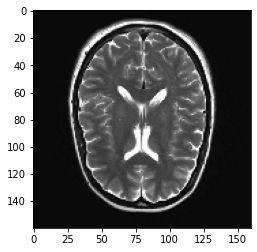

ValueError: ignored

In [ ]:
earlystopper = EarlyStopping(patience=100, verbose=1)
checkpointer = ModelCheckpoint('model_unet_checkpoint.h5', verbose=1, save_best_only=True)
results = model.fit(mask_img, raw_img, validation_split=0.2, batch_size=16, epochs=300, 
                    callbacks=[earlystopper, checkpointer])
model.save(Name+'.h5')
pd.DataFrame.from_dict(results.history).to_csv(Name+'.csv',index=False)


img_id=3
new_img= np.array(mask_img[img_id])
plt.imshow(raw_img[img_id])
plt.show()
new_img = new_img.reshape(1,128,128,3)
new_impr= model.predict(new_img)
plt.imshow(new_impr[0])
plt.show()

In [ ]:
mask_img.shape


(4639, 160, 160, 3)